In [1]:
"""
Script to test the SAMRAI data reader for one particular level of data.
"""

from floatpy.readers import samrai
import numpy

%matplotlib inline
from matplotlib import pyplot as plt
plt.rc("savefig", dpi = 150)


In [2]:
"""
Set the path of the data directory for the data reader.
"""

data_reader = samrai.samraiDataReader()
data_reader.setDataDirectoryPath('/mnt/b9e17de4-9838-4425-ad4c-dc2ad3e41075/manlong/HAMeRS/tests/' + \
                                 '2D_Poggi_Richtmyer_Meshkov_instability/2D_Poggi_Richtmyer_Meshkov_instability_1/' + \
                                 'viz_2D_Poggi_Richtmyer_Meshkov_instability/visit_dump.12002/')


In [3]:
"""
Try to read the summary data.
"""

data_reader.readSummary()

basic_info = data_reader.getBasicInfo()
patch_extents = data_reader.getPatchExtents()
patch_map = data_reader.getPatchMap()


In [4]:
"""
Try to read the domain shape at particular levels.
"""

domain_shape_0 = data_reader.getDomainSizeAtOneLevel(0)
domain_shape_1 = data_reader.getDomainSizeAtOneLevel(1)

print domain_shape_0
print domain_shape_1


[1250  125]
[1324  500]


In [5]:
"""
Try to read one level of density and velocity data.
"""

var_names = ['density', 'velocity']
level_num = 0

data_reader.readDataAtOneLevel(var_names, level_num)

x_coords, y_coords, z_coords = data_reader.getDataCoordinates()
data_rho = data_reader.getData('density')
data_vel = data_reader.getData('velocity')

print data_rho.shape
print data_vel.shape


(1, 1250, 125)
(2, 1250, 125)


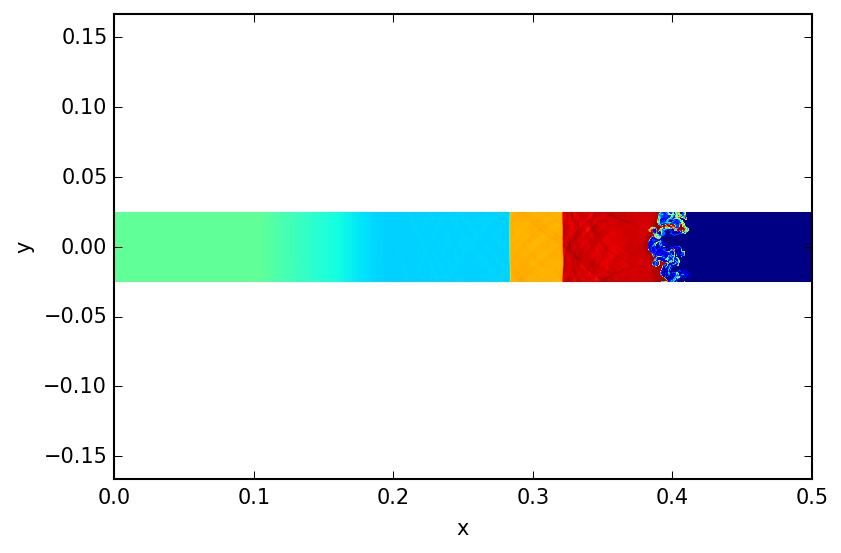

In [6]:
"""
Plot the level of data. (NAN for non-existing data)
"""

data_masked = numpy.ma.masked_where(numpy.isnan(data_rho), data_rho)
X, Y = numpy.meshgrid(x_coords, y_coords)

plt.pcolormesh(X, Y, data_masked[0, :, :].T)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
